# Simple Linear Regression

In [2]:
# ignore non harmful warnings
from warnings import filterwarnings
filterwarnings ("ignore")

## Step 1- Data Ingestion

In [1]:
import pandas as pd
df = pd.read_csv("50_Startups.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


#### PROFIT ~ RND
#### PROFIT_pred = B0 + B1*RND
#### Least square error model

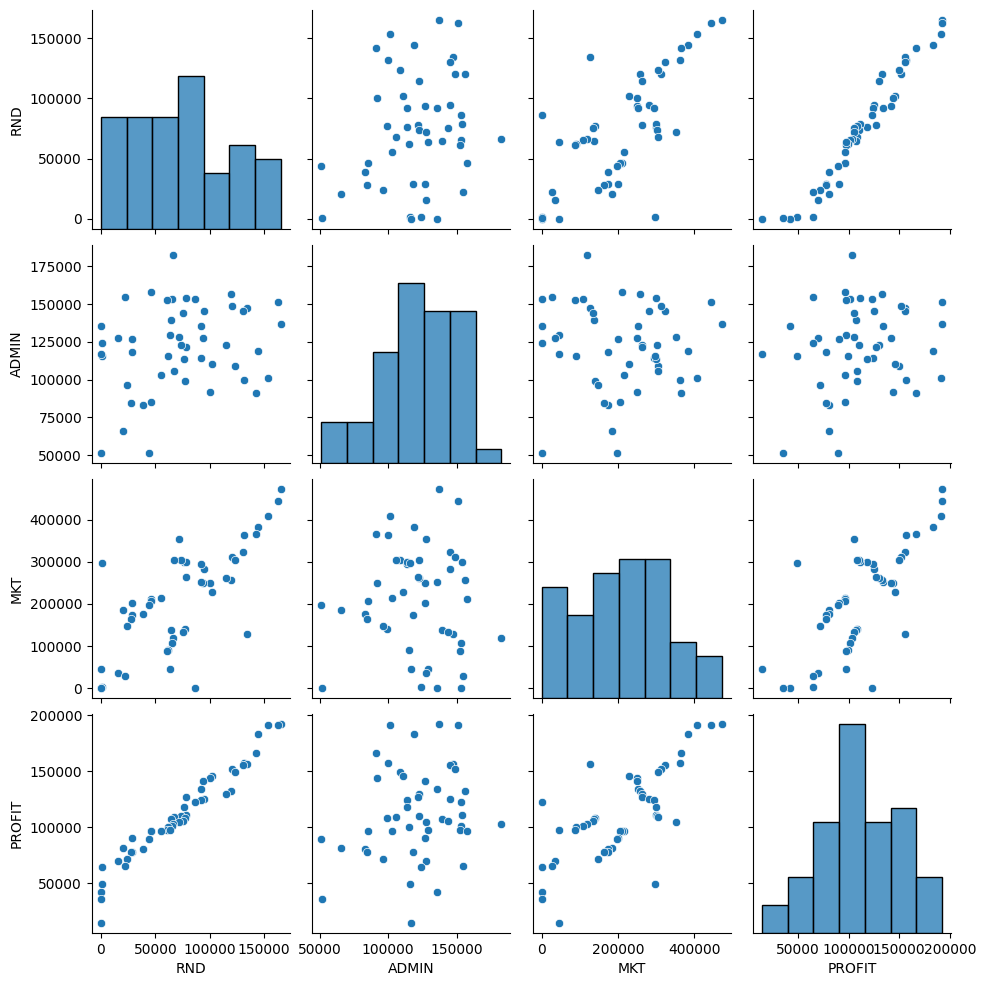

In [2]:
import seaborn as sns
sns.pairplot(df)

## Step2 - Perform Basic data quality check

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

## Step 3 - Separate X(RND) and Y(Profit)

In [6]:
X = df[["RND"]]
Y = df[["PROFIT"]]

In [7]:
X.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [8]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


## Step 4 - Build the Linear Regression model

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

### formula
Profit = B0 + B1* RND
B0 - Intercept
B1 - Slop/ Coeff

In [13]:
model.intercept_

array([49032.89914125])

In [14]:
model.coef_

array([[0.85429137]])

#### Profit_pred = 49032.9 + 0.8542*RND
#### If RND increases by 1 unit Profit will increase by 0.8542
#### if rnd budget is o profit is 49032.0

## Step 5 - Model evaluation

In [15]:
ypred = model.predict(X)
ypred[0:5]

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032]])

In [16]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [17]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

In [18]:
def evaluate_model(model, x, y):
    # predict the results on X
    ypred =model.predict(x)

    # Evaluate all materis
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)

    # Print abovr values
    print(f"RMSE :{rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 Score : {r2:2%}")

In [20]:
evaluate_model(model, X, Y)

RMSE :9226.10
MAE : 6910.98
MAPE : 11.07%
R2 Score : 94.653532%


#### From above r2 score > 80% heanse model is good

### Visualising straight line

<Axes: xlabel='RND', ylabel='PROFIT'>

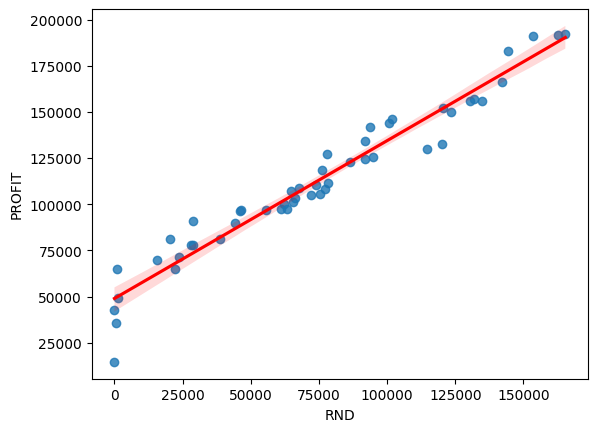

In [22]:
sns.regplot(data=df, x="RND", y="PROFIT", line_kws={"color": "red"})

## ** Step 6- Out of Sample Predection **

In [23]:
X.values[0:5]

array([[165349.2 ],
       [162597.7 ],
       [153441.51],
       [144372.41],
       [142107.34]])

In [24]:
rnd = 30_000
pred = model.predict([[rnd]])
pred

/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[74661.64026942]])

In [25]:
rnd = 200000
pred = model.predict([[rnd]])
pred

/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[219891.17332901]])